### A Basic set of text processing functions

In [33]:
def preprocess(s, lowercase=True, strip_punctuation=True):
    """
    Input:
        string s
        boolean lowercase
        boolean strip_punctuation
    Return:
        list of strings
    """
    punctuation = '.,?<>:;"\'!%[]_`*-'
    if isinstance(s, str):
        s = tokenize(s)
    if lowercase:
        s = [t.lower() for t in s]
    if strip_punctuation:
        s = [t.strip(punctuation) for t in s]
    s = [t for t in s if t !='']
        
    return s

def tokenize(text):
    return text.split()

def token_frequency(text, relative=False):
    """
    Input: text - list of strings
    """
    freqs = {}
    for token in text:
        if token in freqs:
            freqs[token] += 1
        else:
            freqs[token] = 1
    if relative:
        total = len(text)
        for token in freqs:
            freqs[token] = freqs[token]/total
    return freqs

def document_frequency(tfs_list):
    df = {}
    for tf in tfs_list:
        for token in tf:
            if token in df:
                df[token] += 1
            else:
                df[token] = 1
    return df

def type_token(text):
    types = len(set(text))
    tokens = len(text)
    return (types, tokens)

def cartesian_distance(v1, v2):
    dist = 0
    for feature in set(list(v1.keys())+list(v2.keys())):
        if feature in v1 and feature in v2:
            dist += (v1[feature]-v2[feature])**2
        elif feature in v1 and feature not in v2:
            dist += (v1[feature]-0)**2
        else:
            dist += (v2[feature]-0)**2
    return dist**0.5

def token_group_frequency(tf, featureset_list):
    vec = []
    
    for featureset in featureset_list:
        f = 0
        for feature in featureset:
            if feature in tf:
                f += tf[feature]
        vec.append(f)
    return vec

def chunk_corpus(text, chunksize):
    chunks = []
    for start in range(0, len(text)-chunksize+1, chunksize):
        chunk = text[start:start+chunksize]
        chunks.append(chunk)
    return chunks

## Functions created for the project:

In [34]:
import numpy as np

def calculate_feature_word_count (corpus, labels):
    '''
    input:
        corpus: a list of chunk of words from the corpus
        labels: a list containing the label for each chunk.
    returns:
        a tuple.
            first value: average feature word count per chunk for Alcott novel
            second value: average feature word count per chunk for Austen novel
    '''
    alcott_corpus = []
    austen_corpus = []
    for i, v in enumerate(corpus):
        if 'alcott' in labels[i]:
            alcott_corpus.append(corpus[i])
        elif 'austen' in labels[i]:
            austen_corpus.append(corpus[i])

    feature_word_count_alcott = []
    feature_word_count_austen = []

    for chunk in alcott_corpus:
        count = 0
        for word in chunk:
            if word in features:
                count += 1
        feature_word_count_alcott.append(count)

    for chunk in austen_corpus:
        count = 0
        for word in chunk:
            if word in features:
                count += 1
        feature_word_count_austen.append(count)

    average_feature_word_count_alcott = np.mean(feature_word_count_alcott)
    average_feature_word_count_austen = np.mean(feature_word_count_austen)
    return average_feature_word_count_alcott, average_feature_word_count_austen


def calculate_accuracy (corpus, labels):
    '''
    input:
        corpus: a list of chunk of words from the corpus
        labels: a list containing the label for each chunk.
    returns:
        a tuple:
            first value: a numerical value (classification accuracy, in percentage)
            second value: a list of the correct labels (0 or 1) representing ground truth.
                This is used against kmeans.labels_ to check if a chunk is correctly labeled or not.        
    '''
    
    chunk_count = len(corpus)
    print('Total number of chunks: ', chunk_count)
    ground_truth = []

    for i in labels:
        if 'alcott' in i:
            ground_truth.append(0)
        elif 'austen' in i:
            ground_truth.append(1)

    correctly_clustered_count = 0
    incorrectly_clustered_count =0
    for index, ground_truth_label in enumerate(ground_truth):
        if kmeans.labels_[index] == ground_truth_label :
            correctly_clustered_count += 1
        else: 
            incorrectly_clustered_count += 1

    print('Number of chunks correctly classified: ', correctly_clustered_count)
    print('Number of chunks incorrectly classified: ', incorrectly_clustered_count)

    accuracy = 100 * (correctly_clustered_count / chunk_count)
    return accuracy, ground_truth

# Feature 1: Positive Words

This feature set include 2006 words that are associated with 'positivity'; for instance, 'beautiful', 'impeccable' and 'joy'.

In [35]:
with open('/Users/jackcho/Desktop/positive-words.txt') as f:
    positive_words = [word.strip() for word in f.readlines() if word[0] not in [';', '\n']]
print(len(positive_words))

2006


**"This file contains a list of POSITIVE opinion words (or sentiment words)."**

**"This file and the papers can all be downloaded from 
http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html "**

***Citation for the list of positive words:***

Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." 
Proceedings of the ACM SIGKDD International Conference on Knowledge 
Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, 
Washington, USA

## Step 1: Chunk the novels into 5000 word chunks.

In [36]:
import glob

features = positive_words

chunksize = 5000

corpus = [] 
labels = [] 

file_path = '/Users/jackcho/Desktop/LIT432/austen_alcott/*.txt'
file_paths = glob.glob(file_path)

for fp in file_paths:
    
    #preprocess:
    text = (preprocess(open(fp, 'r').read())) 
    
    #create chunks:
    chunks = chunk_corpus(text, chunksize) 
    
    #add chunks to corpus[]
    corpus.extend(chunks) 
    
    #create label:
    label_root = fp.split('/')[-1][:-4]
    for i, c in enumerate(chunks): 
        label = '{}_{:04d}'.format(label_root, i)
        labels.append(label)
        


## Step 2: Turn the chunks into vectors using a given set of features

In [37]:
vector_dicts = [] 


for c in corpus: 
    
    # get a dictionary containing all the words in the chunk:
    tf = token_frequency(c) 

    # CREATE VECTOR BASED ON THE FEATURE SET
    # keep only the words that occur in the feature set.
    v = {k:tf[k] for k in tf if k in features} 

    vector_dicts.append(v)


In [38]:
# vectorize:

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False)
vectors = vectorizer.fit_transform(vector_dicts) 
features = vectorizer.feature_names_

## Step 3: Run K-Means clustering on the chunks with N=2 and report how many of the chunks are accurately classified by author as a percentage

In [39]:
from sklearn.cluster import KMeans

n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(vectors)
# print(kmeans.labels_)

cluster0 = []
cluster1 = []
for nc in range(n_clusters):
    cluster_labels = [l for i, l in enumerate(labels) if kmeans.labels_[i]==nc]
    if nc == 0:
        cluster0 = cluster_labels
    elif nc == 1:
        cluster1 = cluster_labels


In [40]:
# Determine which cluster is a cluster of Alcott novels and which is a cluster of Austen novels.
# This is achieved by examining which author's chunk of the corpus appears dominantly in each cluster.
# This is used to ascertain what the appropriate label for correctness.

austen_count_cluster0 = 0
alcott_count_cluster0 = 0
alcott_label = 0
austen_label = 0
for i in cluster0:
    if 'austen' in i:
        austen_count_cluster0 += 1
    elif 'alcott' in i:
        alcott_count_cluster0 += 1
if alcott_count_cluster0 > austen_count_cluster0:
    print('cluster0 contains mostly ALCOTT novels')
    alcott_label = 0
else:
    print('cluster0 contains mostly AUSTEN novels')
    austen_label = 0
    
austen_count_cluster1 = 0
alcott_count_cluster1 = 0
for i in cluster1:
    austen_count_cluster1 = 0
    alcott_count_cluster1 = 0
    if 'austen' in i:
        austen_count_cluster1 += 1
    elif 'alcott' in i:
        alcott_count_cluster1 += 1
if alcott_count_cluster1 > austen_count_cluster1:
    print('cluster1 contains mostly ALCOTT novels')
    alcott_label = 1
else:
    print('cluster1 contains mostly AUSTEN novels')
    austen_label = 1
    
print('alcott_label is ', alcott_label)
print('austen_label is ', austen_label)

cluster0 contains mostly ALCOTT novels
cluster1 contains mostly AUSTEN novels
alcott_label is  0
austen_label is  1


### Reporting how many of the chunks are accurately classified by author as a percentage:

In [41]:
# Calculating accuracy:


accuracy, ground_truth = calculate_accuracy(corpus, labels)

print("\nAccuracy: {:.2f}%".format(accuracy))

Total number of chunks:  239
Number of chunks correctly classified:  238
Number of chunks incorrectly classified:  1

Accuracy: 99.58%


**99.58% of the chunks have been correctly classified by Kmeans.**

### Examine the mean frequency of positive words per chunk for each author:

In [42]:
#Calculate number of positive words per chunk for each author



average_positive_word_count_alcott, average_positive_word_count_austen = calculate_feature_word_count(corpus, labels)
print("On average, there are {} positive words per chunk in Alcott novels (rounded to nearest integer)".format(round(average_positive_word_count_alcott)))
print("On average, There are {} positive words per chunk in Austen novels (rounded to nearest integer)".format(round(average_positive_word_count_austen)))

On average, there are 248 positive words per chunk in Alcott novels (rounded to nearest integer)
On average, There are 204 positive words per chunk in Austen novels (rounded to nearest integer)


### Histogram representation of mean frequency of positive words per chunk for each author:

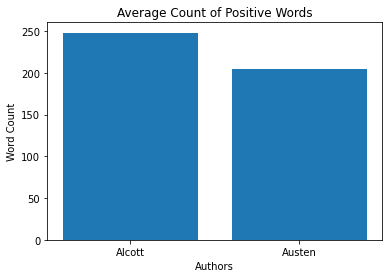

In [43]:
# plot histogram:

import matplotlib.pyplot as plt

plt.bar(['Alcott', 'Austen'], [average_positive_word_count_alcott, average_positive_word_count_austen])
plt.title("Average Count of Positive Words")
plt.xlabel('Authors')
plt.ylabel('Word Count')
plt.show()

## Step 4: Visualize the clusters using PCA.

In [44]:
# for visualization

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(vectors)

x = transformed[:,0]
y = transformed[:,1]



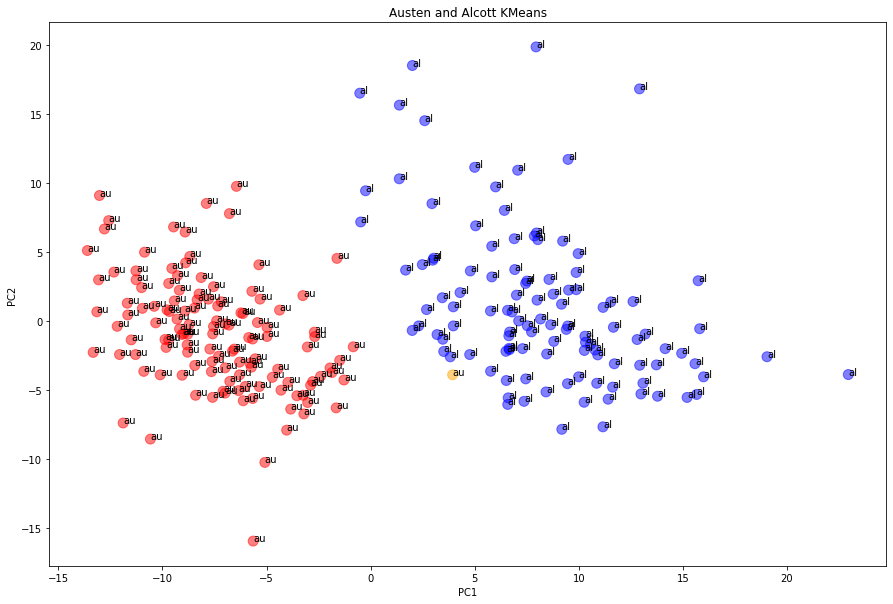

In [45]:
#color correctly clustered Austen texts as red, 
#incorrectly clustered Austen texts as orange; 
#correctly clustered Alcott texts as blue, 
#incorrectly clustered Alcott texts as purple

import matplotlib.pyplot as plt 

cols_custom = []
mislabeled_index = 0
for index, ground_truth_label in enumerate(ground_truth):
    
    #color correctly clustered Austen texts as red
    if ground_truth_label == austen_label and kmeans.labels_[index] == austen_label:
        cols_custom.append('red')
    
    #incorrectly clustered Austen texts as orange; 
    elif ground_truth_label == austen_label and kmeans.labels_[index] != austen_label:
        cols_custom.append('orange')
        mislabeled_index = index
        
    #correctly clustered Alcott texts as blue:
    elif ground_truth_label == alcott_label and kmeans.labels_[index] == alcott_label:
        cols_custom.append('blue')
        
    #incorrectly clustered Alcott texts as purple
    elif ground_truth_label == alcott_label and kmeans.labels_[index] != alcott_label:
            cols_custom.append('purple')






plt.figure(figsize=(15,10))
plt.scatter(x,y, c=cols_custom, s=100, alpha=.5)
for i, l in enumerate(labels):
    plt.text(x[i],y[i], '{}'.format(labels[i][:2]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Austen and Alcott KMeans')
plt.show()

### Observe that only one chunk has been misclassified. 
One chunk of Austen novel has been misclassified as a cluster of Alcott novels.

### Further inspection on the one chunk of Austen novel that has been misclassified to a cluster of Alcott novels:

In [46]:
word_count = 0
for word in corpus[mislabeled_index]:
    if word in features:
        word_count += 1
print("The chunk [{}] was misclassified as Alcott novel, and it contains {} positive words.".format(labels[mislabeled_index], word_count))

print("\nOn average, there are {} positive words per chunk in Alcott novels (rounded to nearest integer)".format(round(average_positive_word_count_alcott)))
print("On average, there are {} positive words per chunk in Austen novels (rounded to nearest integer)".format(round(average_positive_word_count_austen)))

The chunk [austen_mansfield_park_0002] was misclassified as Alcott novel, and it contains 257 positive words.

On average, there are 248 positive words per chunk in Alcott novels (rounded to nearest integer)
On average, there are 204 positive words per chunk in Austen novels (rounded to nearest integer)


**As seen above, the misclassified chunk of Austen's novel was misclassified as Alcott's novel. The chunk contained 257 words included in the feature set. Alcott novels have noticibly more positive words that Austen novels, which may account for why this chunk has been misclassified.**

# Feature 2: Stopwords

This feature set includes stopwords extracted from the corpus.\
Method used:
- For each chunk of 5000 words, retrieve a list of top 100 most frequently used words in the chunk.
- Append all these lists in a single list.
- Cast the list to a set, so as to remove all duplicate stopwords.
- The resulting set of stopwords has **156** words.

### Acquire stopwords by extracting 100 most frequently used words per chunk:

In [47]:
file_path = '/Users/jackcho/Desktop/LIT432/austen_alcott/*.txt'
filenames = glob.glob(file_path)
vectors = []
for fn in filenames:
    tf = token_frequency(preprocess(open(fn, 'r').read()), relative=False)
    vectors.append(tf)

dfs = document_frequency(vectors)

corpus_vectors = []
for vec in vectors:
    doc_vector = {}
    for term in vec:
        if dfs[term] == len(filenames): # our feature set
            doc_vector[term] = vec[term]
    corpus_vectors.append(doc_vector)
    
    
stopwords_custom = []



for i, d in enumerate(corpus_vectors):
    d = dict(sorted(corpus_vectors[i].items(), key=lambda item: item[1], reverse=True))
    top_100_frequent = list(d.keys())[:100]
    stopwords_custom.extend(top_100_frequent)

stopwords_custom = list(set(stopwords_custom))

## Step 1: Chunk the novels into 5000 word chunks.

In [48]:
import glob
from nltk.corpus import stopwords


features = stopwords_custom
chunksize = 5000

corpus = []
labels = []
file_path = '/Users/jackcho/Desktop/LIT432/austen_alcott/*.txt'
file_paths = glob.glob(file_path)
for fp in file_paths:
    text = preprocess(open(fp, 'r').read())
    chunks = chunk_corpus(text, 5000)
    corpus.extend(chunks)
    label_root = fp.split('/')[-1][:-4]
    for i, c in enumerate(chunks):
        label = '{}_{:04d}'.format(label_root, i)
        labels.append(label)



## Step 2: Turn the chunks into vectors using a given set of features

In [49]:
vector_dicts = []
for c in corpus:
    tf = token_frequency(c)
    v = {k:tf[k] for k in tf if k in features}
    vector_dicts.append(v)

In [50]:
from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse=False)
vectors = vectorizer.fit_transform(vector_dicts)
features = vectorizer.feature_names_



## Step 3: Run K-Means clustering on the chunks with N=2 and report how many of the chunks are accurately classified by author as a percentage

In [51]:
from sklearn.cluster import KMeans

n_clusters=2
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(vectors)
# print(kmeans.labels_)


cluster0 = []
cluster1 = []


for nc in range(n_clusters):
    cluster_labels = [l for i, l in enumerate(labels) if kmeans.labels_[i]==nc]
    if nc == 0:
        cluster0 = cluster_labels
    elif nc == 1:
        cluster1 = cluster_labels

In [52]:
# Determine which cluster is a cluster of Alcott novels and which is a cluster of Austen novels.
# This is achieved by examining which author's chunk of the corpus appears dominantly in each cluster.
# This is used to ascertain what the appropriate label for correctness.

austen_count_cluster0 = 0
alcott_count_cluster0 = 0
alcott_label = 0
austen_label = 0
for i in cluster0:
    if 'austen' in i:
        austen_count_cluster0 += 1
    elif 'alcott' in i:
        alcott_count_cluster0 += 1
if alcott_count_cluster0 > austen_count_cluster0:
    print('cluster0 contains mostly ALCOTT novels')
    alcott_label = 0
else:
    print('cluster0 contains mostly AUSTEN novels')
    austen_label = 0
    
austen_count_cluster1 = 0
alcott_count_cluster1 = 0
for i in cluster1:
    austen_count_cluster1 = 0
    alcott_count_cluster1 = 0
    if 'austen' in i:
        austen_count_cluster1 += 1
    elif 'alcott' in i:
        alcott_count_cluster1 += 1
if alcott_count_cluster1 > austen_count_cluster1:
    print('cluster1 contains mostly ALCOTT novels')
    alcott_label = 1
else:
    print('cluster1 contains mostly AUSTEN novels')
    austen_label = 1
    
print('alcott_label is ', alcott_label)
print('austen_label is ', austen_label)

cluster0 contains mostly ALCOTT novels
cluster1 contains mostly AUSTEN novels
alcott_label is  0
austen_label is  1


### Reporting how many of the chunks are accurately classified by author as a percentage:

In [53]:
# calculating accuracy:

accuracy, ground_truth = calculate_accuracy(corpus, labels)
print("\nAccuracy: {:.2f}%".format(accuracy))

Total number of chunks:  239
Number of chunks correctly classified:  239
Number of chunks incorrectly classified:  0

Accuracy: 100.00%


**100.00% of the chunks have been correctly classified by Kmeans.**

### Examine the mean frequency of stopwords per chunk for each author:

In [54]:
#Calculate number of stopwords per chunk for each author


average_stopword_word_count_alcott, average_stopword_word_count_austen = calculate_feature_word_count (corpus, labels)
print("On average, there are {} stopwords per chunk in Alcott novels (rounded to nearest integer)".format(round(average_stopword_word_count_alcott)))
print("On average, there are {} stopwords per chunk in Austen novels (rounded to nearest integer)".format(round(average_stopword_word_count_austen)))

On average, there are 2914 stopwords per chunk in Alcott novels (rounded to nearest integer)
On average, there are 3063 stopwords per chunk in Austen novels (rounded to nearest integer)


### Histogram representation of mean frequency of stopwords per chunk for each author:

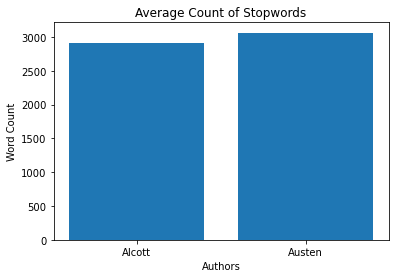

In [55]:
# plot histogram:

import matplotlib.pyplot as plt

plt.bar(['Alcott', 'Austen'], [average_stopword_word_count_alcott, average_stopword_word_count_austen])
plt.title("Average Count of Stopwords")
plt.xlabel('Authors')
plt.ylabel('Word Count')
plt.show()

## Step 4: Visualize the clusters using PCA.


In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(vectors)

x = transformed[:,0]
y = transformed[:,1]

pca.explained_variance_ratio_


array([0.31207377, 0.16205604])

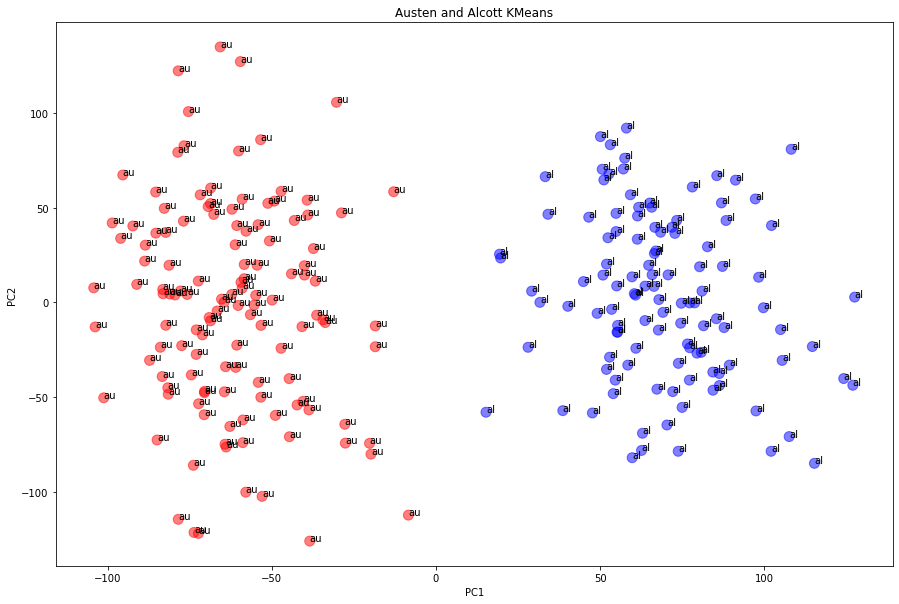

In [57]:
import matplotlib.pyplot as plt 

#color correctly clustered Austen texts as red, 
#incorrectly clustered Austen texts as orange; 
#correctly clustered Alcott texts as blue, 
#incorrectly clustered Alcott texts as purple

cols_custom = []
for index, ground_truth_label in enumerate(ground_truth):
    
    #color correctly clustered Austen texts as red
    if ground_truth_label == austen_label and kmeans.labels_[index] == austen_label:
        cols_custom.append('red')
    
    #incorrectly clustered Austen texts as orange; 
    elif ground_truth_label == austen_label and kmeans.labels_[index] != austen_label:
        cols_custom.append('orange')
        
    #correctly clustered Alcott texts as blue:
    elif ground_truth_label == alcott_label and kmeans.labels_[index] == alcott_label:
        cols_custom.append('blue')
        
    #incorrectly clustered Alcott texts as purple
    elif ground_truth_label == alcott_label and kmeans.labels_[index] != alcott_label:
            cols_custom.append('purple')

            
            

plt.figure(figsize=(15,10))
plt.scatter(x,y, c=cols_custom, s=100, alpha=.5)
for i, l in enumerate(labels):
    plt.text(x[i],y[i], '{}'.format(labels[i][:2]))
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Austen and Alcott KMeans')
plt.show()

### Observe that no chunk of the corpus has been misclassified. The Kmeans algorithm has classified the chunks into works of two authors with an accuracy of 100.00%.